## **2. Data Understanding/Exploration**

In the bank's Australia market, it serve as a merchant bank to focus on trade and financing between Asia and Australia. This dataset will be used by the student analyst to analyse and explore the data to achieve the above stated objective of finding the most highly associated products as a product bundle in their respective markets. 

In this excel file, it has 5 sheets of product data: 'Loans', 'Checking (RBK)', 'Deposits', 'Other Income' for the different product transaction in the Australia market. For this 5 sheets of data transactions, they will be concatenated together before joining up against the 'Profile CIF' data sheet to identify the identity/profile (sector, subsector and archetype) of each of the customers. 

### **2.1 Dataframe 1:** Profile_CIF

In [71]:
# load/import all the relevant libraries
import pandas as pd, numpy as np

# For plotting interactive plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### **2.1.1 Data Exploration**

In [72]:
# Read Profile_CIF
profile_cif_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Profile_CIF")

# Display the first few rows of data
profile_cif_data.head()

,Profile,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CIF Key,Country,Sector,Subsector,Archetype
1,100000002,AU,1,1_5,1_5_3
2,100000007,AU,6,6_6,6_6_2
3,100000008,AU,6,6_1,6_1_1
4,100000012,AU,6,6_2,6_2_2


**Observation:** From the above results, the top few row of dataset is un-named and actual headers (CIF_Key, Country, etc.) are not represented as headers. Hence, changes will be applied to assign the correct header name. 

In [73]:
# Convert the data at index 0 into column headers
profile_cif_data.columns = profile_cif_data.iloc[0]

# Display the first few rows of data 
profile_cif_data.head()

,CIF Key,Country,Sector,Subsector,Archetype
0,CIF Key,Country,Sector,Subsector,Archetype
1,100000002,AU,1,1_5,1_5_3
2,100000007,AU,6,6_6,6_6_2
3,100000008,AU,6,6_1,6_1_1
4,100000012,AU,6,6_2,6_2_2


**Observations:** The headers are now correctly named but the header names are still included among the rest of the data.

In [74]:
# Delete away the second row of data
profile_cif_data = profile_cif_data.drop([0])

# Display the first few rows of data 
profile_cif_data.head()

,CIF Key,Country,Sector,Subsector,Archetype
1,100000002,AU,1,1_5,1_5_3
2,100000007,AU,6,6_6,6_6_2
3,100000008,AU,6,6_1,6_1_1
4,100000012,AU,6,6_2,6_2_2
5,100000041,AU,1,1_6,1_6_2


**Observations:** From this, we can summarise the above exploration into a data dictionary. 
    
* **CIF Key:** This is a unique identification given to each company when they make a transaction with the bank. 
* **Country:** This is the country which the transaction took place in.
* **Sector:** This is the sector which the company falls in. (eg; Consumer Goods, Industrial, etc.)
* **Subsector:** This is the sub-sector which the company falls in. (eg; Animal Protein)
* **Archetype:** This is the archetype which the company falls in. (eg; Dairy, Aquaculture/Seafood) 

In [75]:
# Getting statistical information about the data
profile_cif_data.describe()

,CIF Key,Country,Sector,Subsector,Archetype
count,507,507,507,507,507
unique,504,1,6,36,97
top,2500000008,AU,6,6_1,1_1_2
freq,2,507,112,36,28


**Observations:** Using the describe function, it displays information related to the count, number of unique values, top appearing values and its corresponding appearance count.

From the above results, here are some information that can be concluded:
* **CIF Key:** There are 252 values in this column and all the values are unique. This column is likely to be of <span style="color:red"> **high importance**</span> as this will serve as the column which other product transaction tabs will merge against. 
* **Country:** For country, there is only 1 value. As explained in the above section, all the data transaction tab belongs in the Australia market. This column only confirms all the profiles came from Australia, however, apart from that, this column does not give any more insights. Hence, this column is likely to be of <span style="color:blue"> **low importance**</span> and will thus be removed.
* **Sector:** For sector, there are 6 unique values and the most frequently appearing sector is sector 6 with an appearance count of 57. This column will be further explored/investigated and this column is likely to be of <span style="color:red"> **high importance**</span> as it shows clearly the identity of the customers.
* **Subsector:** For sub-sector, there are 36 unique values and the most frequently appearing sub-sector is sub-sector 5_4 (the 4th subsector of the 5th sector) with an appearance count of 13. This column will be further explored/investigated and this column is likely to be of <span style="color:red"> **high importance**</span> as it shows clearly the identity of the customers.
* **Archetype:** For sector, there are 97 unique values and the most frequently appearing archetype is sector 6_6_2 with an appearance count of 8. This column will be further explored/investigated and this column is likely to be of <span style="color:red"> **high importance**</span> as it shows clearly the identity of the customers.

#### **2.1.2 Data Preparation** - Feature Engineering

Based on the interpretation that has been agreed that the 'Country' column shall be removed as it only contains a single value for which we know the information beforehand. 

In [76]:
# Remove the 'Country' column
profile_cif_data = profile_cif_data.drop(['Country'], axis=1)

# Display the first few rows of data 
profile_cif_data.head()

,CIF Key,Sector,Subsector,Archetype
1,100000002,1,1_5,1_5_3
2,100000007,6,6_6,6_6_2
3,100000008,6,6_1,6_1_1
4,100000012,6,6_2,6_2_2
5,100000041,1,1_6,1_6_2


In [77]:
# Find out number of rows and columns in the dataframe
print("Number of Rows:"+str(len(profile_cif_data.axes[0])))
print("Number of Columns:"+str(len(profile_cif_data.axes[1])))

Number of Rows:507
Number of Columns:4


**Observations:** There are 252 profile rows and 4 columns namely for CIF Key, Sector, Subsector and Archetype. As mentioned earlier, this profile dataset will be used as the referencing dataset that will be lookup and merge against to assign each transaction with a profile identification.

Now, more exploration will be appled to each of the data columns to have more insights about the data.

#### **2.1.4 Data Transformation**

In [78]:
# Information about the number of rows, columns, column data type and memory usage
profile_cif_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1 to 507
Data columns (total 4 columns):
CIF Key      507 non-null object
Sector       507 non-null object
Subsector    507 non-null object
Archetype    507 non-null object
dtypes: object(4)
memory usage: 19.8+ KB


**Observations:** From the above information, here are some of the information that can be interpreted:
* There are 252 rows and 4 columns of data
* All the columns are objects (known as strings) which does not contain any null values

Looking at the nature of the data, it is valid that all the data are objects and hence, no transformation is required.

#### **2.1.5 Data Exploration** - Missing Values

In [79]:
# Check for any null values in the column
null_columns = profile_cif_data.columns[profile_cif_data.isnull().any()]
profile_cif_data[null_columns].isnull().sum()

Series([], dtype: float64)

**Observations:** To verify the information that there are no null values in this profile dataset, the 'isnull()' function has been used to check. From the results, it can be confirmed that null values are not present in any of the data columns.

#### **2.1.6 Data Exploration** - Data Visualisation

For the 'Sector', 'Subsector' and 'Archetype' column, they are likely to be closely related to each other. Hence, more exploration will be made to understand the different company profile.

In [80]:
profile_cif_data.groupby(['Sector','Subsector','Archetype']).agg({'Sector':'count'}).head()

Sector
Sector Subsector Archetype        
1      1_1       1_1_1           3
                 1_1_2          28
                 1_1_3           3
       1_2       1_2_1           5
                 1_2_2          13

**Observations:** From the above table, it provides a very generic level frequency count of each of the values. For example, from the first row of data, it states that there are two customers who falls under the first sector, first subsector and first archetype.

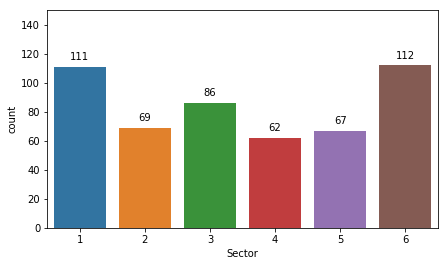

In [81]:
# Control the size of the chart
plt.figure(figsize=(7, 4))

# Find out the distribution of 'Sector'
sector_plot = sns.countplot(x='Sector', data=profile_cif_data)

# Set the y-axis limit
sector_plot.set(ylim=(0, 150))

# Assign annotation to the bar graph
for value in sector_plot.patches:
    sector_plot.annotate(value.get_height(), (value.get_x() + value.get_width()/2., value.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
plt.show()

**Observations:** From the above barplot, the sector which has the most number of frequency is the 6th sector with a frequency of 56. This means that there are more customers who falls under this sector.

Note: this is not an indication that the customers in this sector made more purchases with the bank.

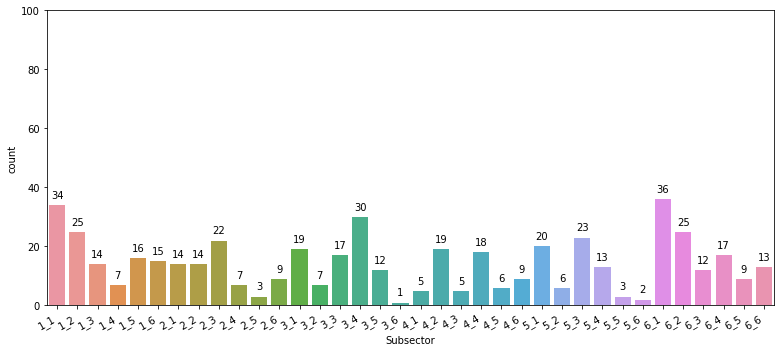

In [82]:
# Control the size of the chart
plt.figure(figsize=(11, 5))

# Find out the distribution of 'Sector'
subsector_plot = sns.countplot(x='Subsector', data=profile_cif_data)

# Set the y-axis limit
subsector_plot.set(ylim=(0, 100))

# Change the layout of the axis labels to make it more visible
subsector_plot.set_xticklabels(subsector_plot.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()

# Assign annotation to the bar graph
for value in subsector_plot.patches:
    subsector_plot.annotate(value.get_height(), (value.get_x() + value.get_width()/2., value.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
plt.show()

**Observations:** From the above barplot, the subsector(s) which has the most number of frequency is:
* 5_4 (4th subsector of the 5th sector) = 13 customers
* 6_6 (6th subsector of the 6th sector) = 13 customers

Note: this is not an indication that the customers in this sector made more purchases with the bank.

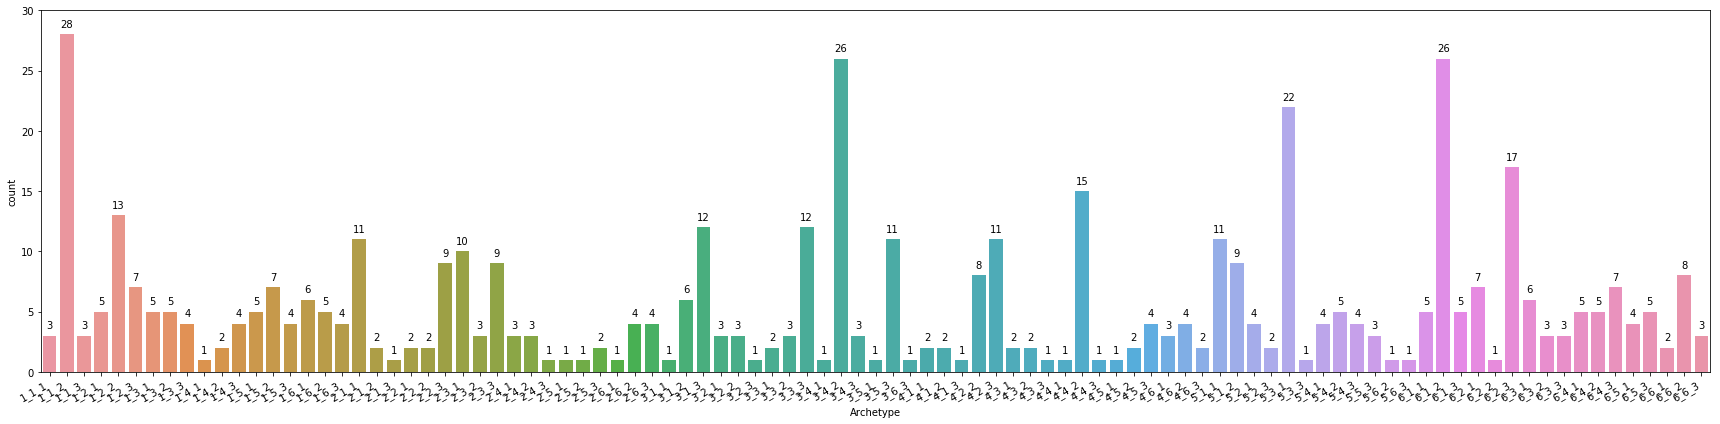

In [83]:
# Control the size of the chart
plt.figure(figsize=(24, 6))

# Find out the distribution of 'Sector'
archetype_plot = sns.countplot(x='Archetype', data=profile_cif_data)

# Set the y-axis limit
archetype_plot.set(ylim=(0, 30))

# Change the layout of the axis labels to make it more visible
archetype_plot.set_xticklabels(archetype_plot.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()

# Assign annotation to the bar graph
for value in archetype_plot.patches:
    archetype_plot.annotate(value.get_height(), (value.get_x() + value.get_width()/2., value.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
    
plt.show()

**Observations:** From the above barplot, the archetype which has the most number of frequency is 6_6_2 (the 2nd archetype from the 6th subsector in the 6th sector) with a frequency of 8.

In conclusion, through the insights that has been interpreted from these 3 graphs, it provides additional domain knowledge towards the profile distribution of the customers who have made purchases with the bank.

### **2.2 Dataframe 2:** Loans

In [84]:
# Read the loans data
loans_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Loans")

# Display the first few rows of data
loans_data.head()

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product,Unnamed: 5,ISO Currency,Segment,Unnamed: 8,End Balance,Unnamed: 10,Average Balance,Unnamed: 12,Interest Income,Unnamed: 14,SUM(INTEREST_CHARGE_CREDIT_SGD) breakdown,Unnamed: 16
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,SUM(CUR_BOOK_BAL_HOME),SUM(CUR_BOOK_BAL_SGD),SUM(AVG_BOOK_BAL_HOME),SUM(AVG_BOOK_BAL_SGD),SUM(INTEREST_INC_EXP_SGD),SUM(INTEREST_CHARG_CREDIT_SGD),SUM(BASE_FTP_AMT_SGD),SUM(LIQUIDITY_PREMIUM_AMT_SGD)
1,2018-01-31 00:00:00,1000000033,65,261,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,253161156,114492947,455473463,1360584201,307400,246186,142818,103368
2,2018-01-31 00:00:00,100000007,65,411,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,123712501,134371116,2540975183,313027823,286392,172537,157146,15391
3,2018-01-31 00:00:00,100000012,65,446,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,51244750,71829366,1731210301,467807512,469742,387693,295213,92480
4,2018-01-31 00:00:00,100000041,65,252,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,14875351,112714783,2845982561,1920499109,43443,406129,340602,65527


**Observations:** From the above table, it can be seen that the column names are not properly named. Fortunately, the first few rows of data provided more information for the correct naming conventions for each of the columns.

In [85]:
# Rename the columns
loans_data.columns = ['Reporting Date', 'CIF Key', 'CTO Officer Code', 'CTO Officer Name', 'Product Type', 'Product Name', 'ISO Currency', 'Segment Type', 'Segment Name', 'Current Book Balance (Home)',  'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (SGD)', 'Liquidity Premium Amount (SGD)']

# Display the first few rows of data
loans_data.head()

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (Home),Current Book Balance (SGD),Average Book Balance (Home),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD)
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,SUM(CUR_BOOK_BAL_HOME),SUM(CUR_BOOK_BAL_SGD),SUM(AVG_BOOK_BAL_HOME),SUM(AVG_BOOK_BAL_SGD),SUM(INTEREST_INC_EXP_SGD),SUM(INTEREST_CHARG_CREDIT_SGD),SUM(BASE_FTP_AMT_SGD),SUM(LIQUIDITY_PREMIUM_AMT_SGD)
1,2018-01-31 00:00:00,1000000033,65,261,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,253161156,114492947,455473463,1360584201,307400,246186,142818,103368
2,2018-01-31 00:00:00,100000007,65,411,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,123712501,134371116,2540975183,313027823,286392,172537,157146,15391
3,2018-01-31 00:00:00,100000012,65,446,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,51244750,71829366,1731210301,467807512,469742,387693,295213,92480
4,2018-01-31 00:00:00,100000041,65,252,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,14875351,112714783,2845982561,1920499109,43443,406129,340602,65527


**Observations:** The column headers are now properly named, however, the first row of data has to be deleted.

In [86]:
# Remove the first row of data
loans_data = loans_data.drop([0])

# Display the first few rows of data
loans_data.head()

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (Home),Current Book Balance (SGD),Average Book Balance (Home),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD)
1,2018-01-31 00:00:00,1000000033,65,261,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,253161156,114492947,455473463,1360584201,307400,246186,142818,103368
2,2018-01-31 00:00:00,100000007,65,411,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,123712501,134371116,2540975183,313027823,286392,172537,157146,15391
3,2018-01-31 00:00:00,100000012,65,446,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,51244750,71829366,1731210301,467807512,469742,387693,295213,92480
4,2018-01-31 00:00:00,100000041,65,252,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,14875351,112714783,2845982561,1920499109,43443,406129,340602,65527
5,2018-01-31 00:00:00,100000058,65,47,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,260699627,269861685,2186632894,798565755,362040,51366,2859,48507


### **2.3 Dataframe 3:** Trade

In [87]:
# Read the trade data
trade_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Trade")

# Display the first few rows of data
trade_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product,Unnamed: 5,ISO Currency,Segment,Unnamed: 8,End Balance,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,SUM(CUR_BOOK_BAL_HOME),...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,1300000069,65,17,Trade Finance Loans,Trade Finance Loans,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,0,...,0,0,0,0,0,0,0,0,0,0


**Observations:** From the above table, it can be seen that the column names are not properly named. Fortunately, the first few rows of data provided more information for the correct naming conventions for each of the columns.

In [88]:
# Rename the columns
trade_data.columns = ['Reporting Date', 'CIF Key', 'CTO Officer Code', 'CTO Officer Name', 'Product Type', 'Product Name', 'ISO Currency', 
                      'Segment Type', 'Segment Name', 'Current Book Balance (Home)', 'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)',
                      'Interest Income Expense (Home)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (Home)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (Home)', 
                      'Base FTP Amount (SGD)', 'Liquidity Premium Amount (Home)', 'Liquidity Premium Amount (SGD)', 'Reserve Cost Amount (Home)', 'Reserve Cost Amount (SGD)',
                      'Strategic Adjusted Amount (Home)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (Home)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (Home)', 
                      'Break Fund Charge (SGD)']

# Display the first few rows of data
trade_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (Home),...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,SUM(CUR_BOOK_BAL_HOME),...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,1300000069,65,17,Trade Finance Loans,Trade Finance Loans,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,0,...,0,0,0,0,0,0,0,0,0,0


**Observations:** The column headers are now properly named, however, the first row of data has to be deleted. 

In [89]:
# Remove the first row of data
trade_data = trade_data.drop([0])

# Display the first few rows of data
trade_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (Home),...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
1,2018-01-31 00:00:00,1300000069,65,17,Trade Finance Loans,Trade Finance Loans,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-31 00:00:00,1300000069,1003,180,Trade Finance Loans,Trade Finance Loans,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,0,...,0,0,0,0,0,0,0,0,0,0


### **2.4 Dataframe 4:** Checking (RBK)

In [90]:
# Read the checking (rbk) data
checking_rbk_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Checking (RBK)")

# Display the first few rows of data
checking_rbk_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product,Unnamed: 6,ISO Currency,Segment,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,100000007,A5010137184624,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,0,0,0,0,0,0,0,0,0,0


**Observations:** From the above table, it can be seen that the column names are not properly named. Fortunately, the first row of data provided more information for the correct naming conventions for each of the columns.

In [91]:
# Find out the exact column name as number of columns is huge
checking_rbk_data.columns

Index(['Reporting Date', 'CIF Key', 'Account Number', 'CTO Officer Code',
       'CTO Officer Name', 'Product', 'Unnamed: 6', 'ISO Currency', 'Segment',
       'Unnamed: 9', 'End Balance', 'Unnamed: 11', 'Average Balance',
       'Unnamed: 13', 'Interest Income', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'FTP Results', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')

In [92]:
# Rename the columns
checking_rbk_data.columns = ['Reporting Date', 'CIF Key', 'Account Number', 'CTO Officer Code', 'CTO Officer Name', 'Product Type', 'Product Name', 'ISO Currency', 
                      'Segment Type', 'Segment Name', 'Current Book Balance (Home)', 'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)',
                      'Interest Income Expense (Home)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (Home)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (Home)', 
                      'Base FTP Amount (SGD)', 'Liquidity Premium Amount (Home)', 'Liquidity Premium Amount (SGD)', 'Reserve Cost Amount (Home)', 'Reserve Cost Amount (SGD)',
                      'Strategic Adjusted Amount (Home)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (Home)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (Home)', 
                      'Break Fund Charge (SGD)']

# Display the first few rows of data
checking_rbk_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,100000007,A5010137184624,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,0,0,0,0,0,0,0,0,0,0


**Observations:** The column headers are now properly named, however, the first row of data has to be deleted.

In [93]:
# Remove the first row of data
checking_rbk_data = checking_rbk_data.drop([0])

# Display the first few rows of data
checking_rbk_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
1,2018-01-31 00:00:00,100000007,A5010137184624,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-31 00:00:00,100000008,A5010136216914,1003,180,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,0,0,0,0,0,0,0,0,0,0


### **2.5 Dataframe 5:** Deposits

In [94]:
# Read the deposits data
deposits_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Deposits")

# Display the first few rows of data
deposits_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product,Unnamed: 6,ISO Currency,Segment,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,300000012,A5010136445123,65,17,FD & Others,Fixed Deposits,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,52.383,83.396,0,0,0,0,0,0,0,0


**Observations:** From the above table, it can be seen that the column names are not properly named. Fortunately, the first row of data provided more information for the correct naming conventions for each of the columns.

In [95]:
# Find out the exact column name as number of columns is huge
deposits_data.columns

Index(['Reporting Date', 'CIF Key', 'Account Number', 'CTO Officer Code',
       'CTO Officer Name', 'Product', 'Unnamed: 6', 'ISO Currency', 'Segment',
       'Unnamed: 9', 'End Balance', 'Unnamed: 11', 'Average Balance',
       'Unnamed: 13', 'Interest Income', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'FTP Results', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29'],
      dtype='object')

In [96]:
# Rename the columns
deposits_data.columns = ['Reporting Date', 'CIF Key', 'Account Number', 'CTO Officer Code', 'CTO Officer Name', 'Product Type', 'Product Name', 'ISO Currency', 
                      'Segment Type', 'Segment Name', 'Current Book Balance (Home)', 'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)',
                      'Interest Income Expense (Home)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (Home)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (Home)', 
                      'Base FTP Amount (SGD)', 'Liquidity Premium Amount (Home)', 'Liquidity Premium Amount (SGD)', 'Reserve Cost Amount (Home)', 'Reserve Cost Amount (SGD)',
                      'Strategic Adjusted Amount (Home)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (Home)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (Home)', 
                      'Break Fund Charge (SGD)']

# Display the first few rows of data
deposits_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,...,CAST(SUM(LIQUIDITY_PREMIUM_AMT_HOME)ASNUMBER),CAST(SUM(LIQUIDITY_PREMIUM_AMT_SGD)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_HOME)ASNUMBER),CAST(SUM(RESERVE_COST_AMT_SGD)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_HOME)ASNUMBER),CAST(SUM(STRATEGIC_ADJ_AMT_SGD)ASNUMBER),SUM(FTP_ADJ_AMT_HOME)ASNUMBER),SUM(FTP_ADJ_AMT_SGD)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_HOME)ASNUMBER),CAST(SUM(BREAK_FUND_CHARGE_SGD)ASNUMBER)
1,2018-01-31 00:00:00,300000012,A5010136445123,65,17,FD & Others,Fixed Deposits,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,52.383,83.396,0,0,0,0,0,0,0,0


**Observations:** The column headers are now properly named, however, the first few rows of data has to be deleted.

In [97]:
# Remove the first row of data
deposits_data = deposits_data.drop([0])

# Display the first few rows of data
deposits_data.head(2)

,Reporting Date,CIF Key,Account Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,...,Liquidity Premium Amount (Home),Liquidity Premium Amount (SGD),Reserve Cost Amount (Home),Reserve Cost Amount (SGD),Strategic Adjusted Amount (Home),Strategic Adjusted Amount (SGD),FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD)
1,2018-01-31 00:00:00,300000012,A5010136445123,65,17,FD & Others,Fixed Deposits,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,52.383,83.396,0,0,0,0,0,0,0,0
2,2018-01-31 00:00:00,1100000001,A5010138072387,1003,180,FD & Others,Fixed Deposits,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,...,18.635,87.15,0,0,0,0,0,0,0,0


### **2.6 Dataframe 6:** Other Income

In [98]:
# Read the deposits data
other_income_data = pd.read_excel("C://Users//Wei Ping//Documents//PBAR//Sydney - Jan 18 to Apr 19.xlsx", sheet_name="Other Income")

# Display the first few rows of data
other_income_data.head(2)

,Reporting Date,CIF Key,Account Number,Transaction Number,CTO Officer Code,CTO Officer Name,Product,Unnamed: 7,ISO Currency,Segment,Unnamed: 10,Application Code,Income Code,Other Income,Unnamed: 14
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,A'||TRANSACTION NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,APPL_CODE,INC_EXP_CD,CAST(SUM(INC_EXP_AMT_HOME)ASNUMBER),CAST(SUM(INC_EXP_AMT_SGD)ASNUMBER)
1,2018-01-31 00:00:00,1400000038,A1127408662996388,A151126406813396819,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,LNS,OTHINC,0,0


**Observations:** From the above table, it can be seen that the column names are not properly named. Fortunately, the first row of data provided more information for the correct naming conventions for each of the columns.

In [99]:
# Find out the exact column name as number of columns is huge
other_income_data.columns

Index(['Reporting Date', 'CIF Key', 'Account Number', 'Transaction Number',
       'CTO Officer Code', 'CTO Officer Name', 'Product', 'Unnamed: 7',
       'ISO Currency', 'Segment', 'Unnamed: 10', 'Application Code',
       'Income Code', 'Other Income', 'Unnamed: 14'],
      dtype='object')

In [100]:
# Rename the columns
other_income_data.columns = ['Reporting Date', 'CIF Key', 'Account Number', 'Transaction Number', 'CTO Officer Code', 'CTO Officer Name', 'Product Type', 'Product Name', 'ISO Currency',
                            'Segment Type', 'Segment Name', 'Application Code', 'Income Code', 'Income Expense Amount (Home)', 'Income Expense Amount (SGD)']

# Display the first few rows of data
other_income_data.head(2)

,Reporting Date,CIF Key,Account Number,Transaction Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Application Code,Income Code,Income Expense Amount (Home),Income Expense Amount (SGD)
0,"TO_CHAR(AS_OF_DATE,'DD/MM/YYYY')",CIF_Key,A'||ACCOUNT NUMBER,A'||TRANSACTION NUMBER,CTO_OFF_CODE,CTO_OFF_NAME,LEVEL_04_DESC,LEVEL_03_DESC,ISO_CURRENCY_CD,LEVEL_07_DESC,LEVEL_03_DESC,APPL_CODE,INC_EXP_CD,CAST(SUM(INC_EXP_AMT_HOME)ASNUMBER),CAST(SUM(INC_EXP_AMT_SGD)ASNUMBER)
1,2018-01-31 00:00:00,1400000038,A1127408662996388,A151126406813396819,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,LNS,OTHINC,0,0


**Observations:** The column headers are now properly named, however, the first few rows of data has to be deleted.

In [101]:
# Remove the first row of data
other_income_data = other_income_data.drop([0])

# Display the first few rows of data
other_income_data.head(2)

,Reporting Date,CIF Key,Account Number,Transaction Number,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Application Code,Income Code,Income Expense Amount (Home),Income Expense Amount (SGD)
1,2018-01-31 00:00:00,1400000038,A1127408662996388,A151126406813396819,65,17,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,LNS,OTHINC,0,0
2,2018-01-31 00:00:00,1500000040,A1173834123996834,A151113102898704897,1003,180,CASA,Current Accounts,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,LNS,OTHINC,0,10


### **2.7 Product Data Creation**

In [102]:
# Creation of Product Data
product_data = pd.concat([loans_data, trade_data, checking_rbk_data, deposits_data, other_income_data], sort=False)

# Display the first few rows of data
product_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (Home),...,FTP ADJ Amount (Home),FTP ADJ Amount (SGD),Break Fund Charge (Home),Break Fund Charge (SGD),Account Number,Transaction Number,Application Code,Income Code,Income Expense Amount (Home),Income Expense Amount (SGD)
1,2018-01-31 00:00:00,1000000033,65,261,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,253161156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-31 00:00:00,100000007,65,411,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,123712501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **2.7.1 Data Exploration**

In [103]:
# Find out number of rows and columns in the dataframe
print("Number of Rows:"+str(len(product_data.axes[0])))
print("Number of Columns:"+str(len(product_data.axes[1])))

Number of Rows:8130
Number of Columns:35


**Observations:** There are 7190 rows and 35 columns of data. However, this figure might change after performing more data exploration.

In [104]:
# Information about the number of rows, columns, column data types, memory usage, etc.
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 1 to 1118
Data columns (total 35 columns):
Reporting Date                      8130 non-null object
CIF Key                             8130 non-null object
CTO Officer Code                    8124 non-null object
CTO Officer Name                    7779 non-null object
Product Type                        8130 non-null object
Product Name                        8130 non-null object
ISO Currency                        8130 non-null object
Segment Type                        8130 non-null object
Segment Name                        8130 non-null object
Current Book Balance (Home)         7012 non-null object
Current Book Balance (SGD)          7012 non-null object
Average Book Balance (Home)         7012 non-null object
Average Book Balance (SGD)          7012 non-null object
Interest Income Expense (SGD)       7012 non-null object
Interest Charge Credit (SGD)        7012 non-null object
Base FTP Amount (SGD)               70

**Observations:** From the above information, a few things can be interpreted. 
* All the data columns are objects (including financial fields). Hence, data transaformation will be performed to change the data type of the respective columns. 
* From the above exploration made earlier, the shape of the data is 7190 by 35. However, there are many columns with lesser than 7190 available data, which indicated missingness. 

#### **2.7.2 Data Transformation**

In [105]:
# Convert the financial fields into numeric data types
product_data[['Current Book Balance (Home)', 'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)', 'Interest Income Expense (Home)', 
              'Interest Income Expense (SGD)', 'Interest Charge Credit (Home)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (Home)', 'Base FTP Amount (SGD)', 'Liquidity Premium Amount (Home)',
              'Liquidity Premium Amount (SGD)', 'Reserve Cost Amount (Home)', 'Reserve Cost Amount (SGD)', 'Strategic Adjusted Amount (Home)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (Home)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (Home)', 'Break Fund Charge (SGD)', 'Income Expense Amount (Home)', 'Income Expense Amount (SGD)']] = product_data[['Current Book Balance (Home)', 'Current Book Balance (SGD)', 'Average Book Balance (Home)', 'Average Book Balance (SGD)', 'Interest Income Expense (Home)', 
              'Interest Income Expense (SGD)', 'Interest Charge Credit (Home)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (Home)', 'Base FTP Amount (SGD)', 'Liquidity Premium Amount (Home)',
              'Liquidity Premium Amount (SGD)', 'Reserve Cost Amount (Home)', 'Reserve Cost Amount (SGD)', 'Strategic Adjusted Amount (Home)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (Home)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (Home)', 'Break Fund Charge (SGD)', 'Income Expense Amount (Home)', 'Income Expense Amount (SGD)']].apply(pd.to_numeric, errors="coerce")

In [106]:
# Information about the number of rows, columns, column data types, memory usage, etc.
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 1 to 1118
Data columns (total 35 columns):
Reporting Date                      8130 non-null object
CIF Key                             8130 non-null object
CTO Officer Code                    8124 non-null object
CTO Officer Name                    7779 non-null object
Product Type                        8130 non-null object
Product Name                        8130 non-null object
ISO Currency                        8130 non-null object
Segment Type                        8130 non-null object
Segment Name                        8130 non-null object
Current Book Balance (Home)         7012 non-null float64
Current Book Balance (SGD)          7012 non-null float64
Average Book Balance (Home)         7012 non-null float64
Average Book Balance (SGD)          7012 non-null float64
Interest Income Expense (SGD)       7012 non-null float64
Interest Charge Credit (SGD)        7012 non-null float64
Base FTP Amount (SGD)           

**Observations:** From the above results, all the financial fields are now correctly converted into the correct data type - float. In this table, it can also be seen that for each of the financial fields, there will be a column in a home currency value and another column in SGD currency value. To prevent overloading the data model with too much fields, some feature engineering will be performed to remove away the columns in the home currency. 

#### **2.7.2 Data Preparation:** Feature Engineering

In this feature engineering section, here are a list of techniques that will be performed on the data.
1. Dropping of un-needed variables
2. Imputation of Missing Values
3. Identifying Duplicates
4. Handling Outliers

#### **2.7.2.1 Dropping of un-needed variables**

As mentioned before, those columns with home currency values will be removed as the SGD currency will be an easier indicator of the financial values.

In [107]:
# Remove away all the financial fields with Home currency
product_data = product_data.drop(columns = ['Current Book Balance (Home)', 'Average Book Balance (Home)', 'Interest Income Expense (Home)', 'Interest Charge Credit (Home)', 'Base FTP Amount (Home)', 
                                           'Liquidity Premium Amount (Home)', 'Reserve Cost Amount (Home)', 'Strategic Adjusted Amount (Home)', 'FTP ADJ Amount (Home)', 'Break Fund Charge (Home)', 'Income Expense Amount (Home)'])

In [108]:
# Display the first few rows of data
product_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),...,Liquidity Premium Amount (SGD),Reserve Cost Amount (SGD),Strategic Adjusted Amount (SGD),FTP ADJ Amount (SGD),Break Fund Charge (SGD),Account Number,Transaction Number,Application Code,Income Code,Income Expense Amount (SGD)
1,2018-01-31 00:00:00,1000000033,65,261,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,...,103368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-31 00:00:00,100000007,65,411,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,...,15391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **2.7.2.2 Missing Values:**

In [109]:
# Check for null values in the column
null_product_columns = product_data.columns[product_data.isnull().any()]
product_data[null_product_columns].isnull().sum()

CTO Officer Code                      6
CTO Officer Name                    351
Current Book Balance (SGD)         1118
Average Book Balance (SGD)         1118
Interest Income Expense (SGD)      1118
Interest Charge Credit (SGD)       1118
Base FTP Amount (SGD)              1118
Liquidity Premium Amount (SGD)     1118
Reserve Cost Amount (SGD)          4636
Strategic Adjusted Amount (SGD)    4636
FTP ADJ Amount (SGD)               4636
Break Fund Charge (SGD)            4636
Account Number                     4240
Transaction Number                 7012
Application Code                   7012
Income Code                        7012
Income Expense Amount (SGD)        7012
dtype: int64

**Observations:** From the above results, there seems to be columns with plenty number of missing values. Even though the missingness is recorded, when referred to the raw file, there are many cells with missing values that are represented in '-'. However, this value is represented as 0 in the concatenated data. Hence, to show a distinctive indication of missing values, all 0/- will be replaced with a null value. 

In [110]:
# Replace the '-' with null for easy identification of missingness
product_data = product_data.replace(to_replace=0, value = np.nan)

# Display the first few rows of data
product_data.head(2)

,Reporting Date,CIF Key,CTO Officer Code,CTO Officer Name,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),...,Liquidity Premium Amount (SGD),Reserve Cost Amount (SGD),Strategic Adjusted Amount (SGD),FTP ADJ Amount (SGD),Break Fund Charge (SGD),Account Number,Transaction Number,Application Code,Income Code,Income Expense Amount (SGD)
1,2018-01-31,1000000033,65.0,261.0,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,...,103368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-31,100000007,65.0,411.0,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,...,15391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Check for any null values in the column 
null_product_columns = product_data.columns[product_data.isnull().any()]
product_data[null_product_columns].isnull().sum()

CTO Officer Code                      6
CTO Officer Name                    351
Current Book Balance (SGD)         1654
Average Book Balance (SGD)         1152
Interest Income Expense (SGD)      2311
Interest Charge Credit (SGD)       1889
Base FTP Amount (SGD)              1972
Liquidity Premium Amount (SGD)     4305
Reserve Cost Amount (SGD)          8130
Strategic Adjusted Amount (SGD)    8128
FTP ADJ Amount (SGD)               8130
Break Fund Charge (SGD)            8122
Account Number                     4240
Transaction Number                 7012
Application Code                   7012
Income Code                        7012
Income Expense Amount (SGD)        7036
dtype: int64

**Observations:** From the above results, there are more null values shown for each column. It can also be seen that there are many missing values spread throughout the different column. Since the row size of the dataset is not a huge one with a size of 7190., deletion will not be a vital option. Thus, more exploration will be made before deciding what to do with these missing values. However, for columns with too many missing values, it has to be deleted. The reason for this is because even if imputations are made on these missing values, it will be inaccurate as there are not enough available data to measure the most accurate prediction of these missing values. 

Some of these columns will include:

**Categorical Variables**
* CTO Officer Code/CTO Officer Name: Even though there are not many missing values, both of these columns are very specific to the officer identity who attended to the various companies who made purchases with the bank. However, this information is likely to be not needed when performing the product analysis. Thus, this column will be deleted. 
* Account Number/Transaction Number/Application Code/Income Code: For these few columns they consists of large number of missing values. Like the previous 2 identified columns, they are not likely to be needed when performing the product analysis later on. Therefore, they will be removed.

**Continuous Variables**
* Reserve Cost Amount (SGD)/ Strategic Adjusted Amount (SGD)/ FTP ADJ Amount (SGD)/ Break Fund Charge (SGD): For all these financial fields, they will be chosen to be removed. As explained earlier, with such great amount of missing values, imputation will be inaccurate due to minimal data availability.

**Exceptions:** For Income Expense Amount (SGD), exceptions will be made for it. This column is a unique column which identifies data that are represented under the 'other income' transaction tab and does not exists in other tabs. Hence, it is explanable that it has so many seemingly "missing values". If this column were to be removed and imputations were to be made for the columns that it does not have such as "current book balance", it will look like a duplicated data which it isn't. Therefore, this column will *not* be removed.

In [112]:
# Removal of columns with large number of missing values
product_data = product_data.drop(columns=['CTO Officer Code', 'CTO Officer Name', 'Reserve Cost Amount (SGD)', 'Strategic Adjusted Amount (SGD)', 'FTP ADJ Amount (SGD)', 'Break Fund Charge (SGD)', 'Account Number', 'Transaction Number', 'Application Code', 'Income Code'])

In [113]:
# Display the first few rows of data
product_data.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD)
1,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,NaN
2,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,NaN


#### **2.7.2.3 Identifying Duplicates**

In [114]:
# Create a dummy df for duplicate identification
products_data_dummy = product_data[:].copy()

# Search for duplicated data
products_data_dummy['is_duplicated'] = products_data_dummy.duplicated()
products_data_dummy.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD),is_duplicated
1,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,NaN,False
2,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,NaN,False


In [115]:
# Creating a tabular table for the distribution of duplicated = TRUE and non-duplicated = FALSE
value_count = products_data_dummy['is_duplicated'].value_counts()
percent100 = products_data_dummy['is_duplicated'].value_counts(normalize=True).mul(100).round(1).astype(str)

pd.DataFrame({'Total Count': value_count, 'Total Count %': percent100})

,Total Count,Total Count %
False,8113,99.8
True,17,0.2


**Observations:** The number of true values for duplication is not very high for 7190 of data. With such low number of duplicated values, it is a valid option to remove them. Furthermore, this rationale is supported by the fact that when perform data modelling later on, having duplicated values may affect the accuracy of the results. Hence, these duplicated values will be dropped.

In [116]:
# Remove duplicates
product_data = product_data.drop_duplicates()

# Display the first few rows of data
product_data.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD)
1,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,NaN
2,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,NaN


In [117]:
# Peek at the shape of the data
product_data.shape

(8113, 14)

#### **2.7.2.4 Identifying Outliers**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B4C21AA6A0>,
      dtype=object)

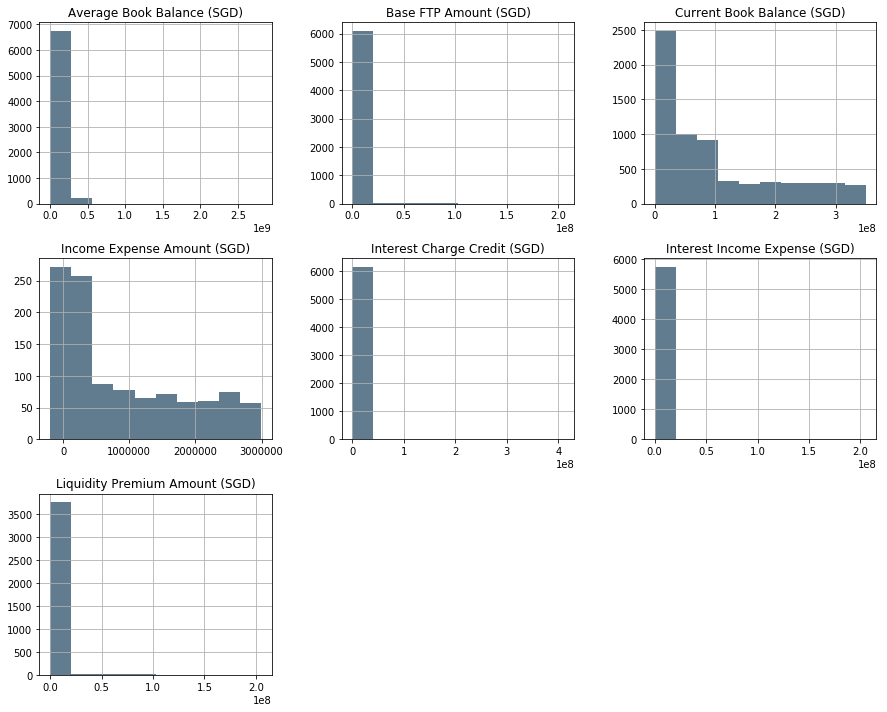

In [118]:
# Plotting histogram to identify outliers
exclude=['CIF Key']
product_data.loc[:, product_data.columns.difference(exclude)].hist(figsize=(15,12), color='#607c8e')

**Observations:** From the above histogram distribution, it can be seen that for most of the financial fields, they are skewed towards the right and with a large range of values. 

**Columns with exceptions:** 
* For Interest Income Expense, there are some negative values. We do not consider this as dirty data and can be interpreted that the company paid more interest on loans than they received in interest on their investment. 

#### **2.7.2.5 Missing Value Imputation** 
Based on the graph from before, it can be seen that the data are all skewed towards the right. To handle missing values, one can choose to impute mean, median or mode values.

* Mean: The mean value is not a good option since the mean will be affecteed by the skewed values. 
* Median: The median value is a better option as it will take the values at the midpoint of a frequency distribution.

Hence, the median value imputation medthod will be chosen.

In the dataset, it is understood that there are different type of products. For each of the different products, there will definitely be a different range of values that each financial fields will have. Therefore, it cannot be assumed that the missing value imputation should all be the same. 

In [119]:
# Summarise missing values
print('Null values by variables:')
print('---------------------------------------------------')
product_data.isnull().sum()

Null values by variables:
---------------------------------------------------


Reporting Date                       0
CIF Key                              0
Product Type                         0
Product Name                         0
ISO Currency                         0
Segment Type                         0
Segment Name                         0
Current Book Balance (SGD)        1637
Average Book Balance (SGD)        1139
Interest Income Expense (SGD)     2294
Interest Charge Credit (SGD)      1876
Base FTP Amount (SGD)             1959
Liquidity Premium Amount (SGD)    4288
Income Expense Amount (SGD)       7032
dtype: int64

In [120]:
# Finding the median values by product type
print('Variables median values by product type:')
print('---------------------------------------------------')
print(product_data.groupby('Product Type').median().groupby('Product Type')[['Current Book Balance (SGD)', 'Average Book Balance (SGD)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (SGD)', 'Base FTP Amount (SGD)', 'Liquidity Premium Amount (SGD)', 'Income Expense Amount (SGD)']].median().round(2))

Variables median values by product type:
---------------------------------------------------
                        Current Book Balance (SGD)  \
Product Type                                         
CASA                                    39077872.0   
FD & Others                             15796861.5   
Loans (Non Trade)                      123753396.0   
Trade Finance Loans                      1622270.5   
Trade Finance Services                   1644240.0   

                        Average Book Balance (SGD)  \
Product Type                                         
CASA                                        3467.0   
FD & Others                               549619.5   
Loans (Non Trade)                      108498487.0   
Trade Finance Loans                      1331732.0   
Trade Finance Services                   1583476.5   

                        Interest Income Expense (SGD)  \
Product Type                                            
CASA                               

**Observations:** As can be seen from the above table, there are some calculated median values which are represented as 'NaN'. With the exceptions of the financial field and product type with NaN values, the other calculated values will be used to impute amongst the missing cells. 

In [121]:
# Imputation of median value for Current Book Balance (SGD)
product_data['Current Book Balance (SGD)'] = product_data.groupby('Product Type')['Current Book Balance (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Current Book Balance (SGD)'] = product_data['Current Book Balance (SGD)'].round(2)

In [122]:
# Imputation of median value for Average Book Balance (SGD)
product_data['Average Book Balance (SGD)'] = product_data.groupby('Product Type')['Average Book Balance (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Average Book Balance (SGD)'] = product_data['Average Book Balance (SGD)'].round(2)

In [123]:
# Imputation of median value for Interest Income Expense (SGD)
product_data['Interest Income Expense (SGD)'] = product_data.groupby('Product Type')['Interest Income Expense (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Interest Income Expense (SGD)'] = product_data['Interest Income Expense (SGD)'].round(2)

In [124]:
# Imputation of median value for Interest Charge Credit (SGD)
product_data['Interest Charge Credit (SGD)'] = product_data.groupby('Product Type')['Interest Charge Credit (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Interest Charge Credit (SGD)'] = product_data['Interest Charge Credit (SGD)'].round(2)

In [125]:
# Imputation of median value for Base FTP Amount (SGD)
product_data['Base FTP Amount (SGD)'] = product_data.groupby('Product Type')['Base FTP Amount (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Base FTP Amount (SGD)'] = product_data['Base FTP Amount (SGD)'].round(2)

In [126]:
# Imputation of median value for Liquidity Premium Amount (SGD)
product_data['Liquidity Premium Amount (SGD)'] = product_data.groupby('Product Type')['Liquidity Premium Amount (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Liquidity Premium Amount (SGD)'] = product_data['Liquidity Premium Amount (SGD)'].round(2)

In [127]:
# Imputation of median value for Income Expense Amount (SGD)
product_data['Income Expense Amount (SGD)'] = product_data.groupby('Product Type')['Income Expense Amount (SGD)'].transform(lambda x: x.fillna(x.median()))

product_data['Income Expense Amount (SGD)'] = product_data['Income Expense Amount (SGD)'].round(2)

| Product Type | Financial Fields | Median |
| -- | -- | -- |
| Trade Finance Loans | Liquidity Premium Amount (SGD) | NaN |
| Trade Finance Services | Liquidity Premium Amount (SGD) | NaN |
| FD & Others | Income Expense Amount (SGD) | NaN |

**Observations:** The above table consists of all the product types and its relevant financial fields that does not have a median value. When referred back to the raw file, it is true that these products does not contain any value for these financial fields. Hence, the missing values will be imputed with the values from the median of the entire financial fields instead. 

In [128]:
# Overall median
print('Overall Liquidity Premium Amount (SGD) median:', product_data['Liquidity Premium Amount (SGD)'].median())
print('Overall Income Expense Amount (SGD) median:', product_data['Income Expense Amount (SGD)'].median())

Overall Liquidity Premium Amount (SGD) median: 43265.0
Overall Income Expense Amount (SGD) median: 1336641.0


In [129]:
# Imputations of Liquidity Premium Amount (SGD) with overall median
product_data['Liquidity Premium Amount (SGD)'] = product_data['Liquidity Premium Amount (SGD)'].replace(np.nan,product_data['Liquidity Premium Amount (SGD)'].median())

In [130]:
# Imputations of Income Expense Amount (SGD) with overall median
product_data['Income Expense Amount (SGD)'] = product_data['Income Expense Amount (SGD)'].replace(np.nan,product_data['Income Expense Amount (SGD)'].median())

### **2.7 Combining Products data with Profile data**

In this section, the prepared profile data will be merged with the products data. This will finalise the data that is made for modelling. 

In [131]:
# Merging both dataframe
product_bundle_analysis_and_recommendation = pd.merge(product_data, profile_cif_data, on='CIF Key', how='left')

# Peek at the data
product_bundle_analysis_and_recommendation.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD),Sector,Subsector,Archetype
0,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0,6,6_3,6_3_1
1,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0,6,6_6,6_6_2


As stated above, the ultimate aim of this project is to recommend the top product bundles for each portfolio. In the above dataframe, the product type and product name are separated into 2 columns. Hence, to better represent the products, a derived column should be created to combine these 2 columns together.

In [132]:
# Create Product Combine (Product Type and Name) column
product_bundle_analysis_and_recommendation['Product_Combine'] = product_bundle_analysis_and_recommendation['Product Type'] + ', ' + product_bundle_analysis_and_recommendation['Product Name']

In [133]:
# Peek at the data
product_bundle_analysis_and_recommendation.head(2)
# Export the data
#product_bundle_analysis_and_recommendation.to_excel("C://Users//Wei Ping//Documents//PBAR_Final//Pbar_draft.xlsx", sheet_name="PBAR")

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD),Sector,Subsector,Archetype,Product_Combine
0,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0,6,6_3,6_3_1,"Loans (Non Trade), Commercial Loan Non Trade"
1,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0,6,6_6,6_6_2,"Loans (Non Trade), Commercial Loan Non Trade"


In [134]:
# Create a Product Key column to simplify how the Product Combine categories look
product_bundle_analysis_and_recommendation['Product_Key'] = np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'CASA, Current Accounts', 'CASA',
                                                                    np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'CASA, Savings Accounts', 'CASA',
                                                                            np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'FD & Others, Fixed Deposits', 'Fixed_Deposits',
                                                                                    np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Loans (Non Trade), Commercial Loan Non Trade', 'Commercial_Loans',
                                                                                            np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Loans (Non Trade), Customer Loans - Generic', 'Retail_Loans',
                                                                                                    np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Loans (Non Trade), Retail - Secured Loans', 'Retail_Loans',
                                                                                                            np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Loans (Non Trade), Term Loans', 'Commercial_Loans', 
                                                                                                                    np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Trade Finance Loans, Trade Finance Loans', 'Trade_Finance_Loans_Services',
                                                                                                                            np.where(product_bundle_analysis_and_recommendation['Product_Combine'] == 'Trade Finance Services, Trade Finance Services', 'Trade_Finance_Loans_Services', 'Others')))))))))
product_bundle_analysis_and_recommendation.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD),Sector,Subsector,Archetype,Product_Combine,Product_Key
0,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0,6,6_3,6_3_1,"Loans (Non Trade), Commercial Loan Non Trade",Commercial_Loans
1,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0,6,6_6,6_6_2,"Loans (Non Trade), Commercial Loan Non Trade",Commercial_Loans


In [135]:
#product_bundle_analysis_and_recommendation.to_excel("C://Users//Wei Ping//Documents//PBAR//Pbar_draft_2.xlsx", sheet_name="PBAR")

In [136]:
# Create a Archetype + Product Key combine (which will be very important for us in the data modelling process to identify the portfolio and its relevant product purchased)
product_bundle_analysis_and_recommendation['Archetype_Product_Key'] = product_bundle_analysis_and_recommendation['Product_Key'] + "_" + product_bundle_analysis_and_recommendation['Archetype'].astype(str)

product_bundle_analysis_and_recommendation.head(2)

,Reporting Date,CIF Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD),Sector,Subsector,Archetype,Product_Combine,Product_Key,Archetype_Product_Key
0,2018-01-31,1000000033,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0,6,6_3,6_3_1,"Loans (Non Trade), Commercial Loan Non Trade",Commercial_Loans,Commercial_Loans_6_3_1
1,2018-01-31,100000007,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0,6,6_6,6_6_2,"Loans (Non Trade), Commercial Loan Non Trade",Commercial_Loans,Commercial_Loans_6_6_2


In [137]:
# Reposition the columns
product_bundle_analysis_and_recommendation = product_bundle_analysis_and_recommendation[['CIF Key', 'Reporting Date', 'Product_Key', 'Product_Combine', 'Sector', 'Subsector', 'Archetype',
                                                                                        'Archetype_Product_Key', 'Product Type', 'Product Name', 'ISO Currency', 'Segment Type', 'Segment Name',
                                                                                        'Current Book Balance (SGD)', 'Average Book Balance (SGD)', 'Interest Income Expense (SGD)', 'Interest Charge Credit (SGD)',
                                                                                        'Base FTP Amount (SGD)', 'Liquidity Premium Amount (SGD)', 'Income Expense Amount (SGD)']]

# Peek at the data
product_bundle_analysis_and_recommendation.head(2)

,CIF Key,Reporting Date,Product_Key,Product_Combine,Sector,Subsector,Archetype,Archetype_Product_Key,Product Type,Product Name,ISO Currency,Segment Type,Segment Name,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD)
0,1000000033,2018-01-31,Commercial_Loans,"Loans (Non Trade), Commercial Loan Non Trade",6,6_3,6_3_1,Commercial_Loans_6_3_1,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_Corporate Banking and IPF,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0
1,100000007,2018-01-31,Commercial_Loans,"Loans (Non Trade), Commercial Loan Non Trade",6,6_6,6_6_2,Commercial_Loans_6_6_2,Loans (Non Trade),Commercial Loan Non Trade,AUD,Wholesale Banking,UOB Aust_FIG,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0


**Observations:** From the above table, there will be some columns which will be removed. 
1. Product Type and Product Name: Since the Product_Combine has been created from it to form the product key, this 2 columns will not be needed. 
2. ISO Currency: This column will be useful for the financial fields for the 'Home' currency. However, since those columns are removed, this column  will lose its usefulness.
3. Segment Type and Segment Name: For this 2 columns, it only shows the banking segment who attended to the company, it does not provide much usefulness for the future analysis of products.

Therefore, all these columns will be removed.

In [138]:
# Removal of above stated columns
product_bundle_analysis_and_recommendation = product_bundle_analysis_and_recommendation.drop(columns=['Product Type', 'Product Name', 'ISO Currency', 'Segment Type', 'Segment Name'])

In [139]:
# Peek at the data
product_bundle_analysis_and_recommendation.head(2)

,CIF Key,Reporting Date,Product_Key,Product_Combine,Sector,Subsector,Archetype,Archetype_Product_Key,Current Book Balance (SGD),Average Book Balance (SGD),Interest Income Expense (SGD),Interest Charge Credit (SGD),Base FTP Amount (SGD),Liquidity Premium Amount (SGD),Income Expense Amount (SGD)
0,1000000033,2018-01-31,Commercial_Loans,"Loans (Non Trade), Commercial Loan Non Trade",6,6_3,6_3_1,Commercial_Loans_6_3_1,114492947.0,1.360584e+09,307400.0,246186.0,142818.0,103368.0,1336641.0
1,100000007,2018-01-31,Commercial_Loans,"Loans (Non Trade), Commercial Loan Non Trade",6,6_6,6_6_2,Commercial_Loans_6_6_2,134371116.0,3.130278e+08,286392.0,172537.0,157146.0,15391.0,1336641.0


In [141]:
# Export the data
product_bundle_analysis_and_recommendation.to_excel("C://Users//Wei Ping//Documents//PBAR//Product_Bundle_Analysis_and_Recommendation.xlsx", sheet_name="PBAR")